### DS105 Lesson 1 

In [3]:
### Be sure to start off by importing the necessary packages:

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### Next you would need to read in your data:
### This method below is with a relative path and each dot is backing up from a folder I have the dataset in, so 3 steps back
### C:\Users\Mia\OneDrive\Documents\DS Examples\data <- my original path, 3 dots takes me to the Documents folder which is what 
### you see it is starting with below

### If you want to do your data absolute to your computer you would need to download the data from the lesson, and read it in:
### dataname= pd.read_excel('C:\Users\Mia\OneDrive\Documents\DS Examples\data.excel')
### So the above it not done! That is how it copies in when you copy and paste your path on a windows! The slashes need to go the 
### opposite direction! :
### dataname= pd.read_excel('C:/Users/Mia/OneDrive/Documents/DS Examples/data.xlsx')
### when you have excel files the extension is .xlsx
### when you have csv files the extension is .csv 


In [4]:
data = pd.read_excel('../Data/hybrid2013.xlsx')

In [5]:
data.head()

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
0,111,Prius C,2013,19080,8.70,50,50,C,1
1,112,Jetta,2013,24995,12.66,45,45,C,1
2,113,Civic,2013,24360,10.20,44,44,C,1
3,114,Prius,2013,24200,10.20,50,50,M,3
4,115,Fusion FWD,2013,27200,11.72,47,47,M,3


### Single Sample t-test

### Creating a histogram for looking at the MPG: 

In [6]:
### below the syntax for a histogram:
### data_name['column_name'].hist()
### so you would fill in the name of your data, here I went really original and just used "data" and the column we are looking at 
### is mpg. Make sure you spell everything exactly as it shows up in your data or it will give you an error!
### This is why it is always a good idea to run the .head() function on your data so you can see the spelling of all the columns.


<AxesSubplot:>

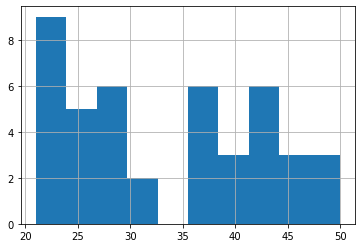

In [7]:
data['mpg'].hist()

In [8]:
### Single Sample t-Test
# Remember that a single-sample t-test is meant to examine whether a particular value is different than the population mean. 

In [9]:
### We will look at comparing 37 MPG to see if that is signficantly different from the average MPG:

In [10]:
stats.ttest_1samp(data['mpg'], 37)

Ttest_1sampResult(statistic=-2.387590693731423, pvalue=0.021535424160203327)

In [11]:
### p value is 0.0215  when p < .05 the null hypothesis is rejected and the alternative hypothesis is accepted as 
### there is a significant result

In [12]:
### So we know from the p value that the result is significant, but is it significantly higher or lower than the average? 
### We will look at the mean:

In [13]:
data.mpg.mean()

33.48837209302326

In [14]:
### We see that the mean is 33.488 so 37 would be significantly higher than the average

### Independent t test

In [15]:
### An independent t test is used when you have one independent variable that is categorical and a grouping variable, 
### and one dependent continuous variable. Use an independent t-test when you want to determine whether the means of two 
### different, unrelated groups are the same or different (from page 5 of lesson).

In [16]:
### First, I wanted to see what carclass options we have, you can do this two ways: data_name.column_name.unique() displays the 
### column options or levels more spread out
### To see the column options vertically, you can do data_name.column_name.value_counts() and that displays them all straight down


In [17]:
data.carclass.unique()

array(['C', 'M', 'L', 'SUV', 'PT'], dtype=object)

In [18]:
### Let's look at the differences between the large cars and the SUVs!

In [19]:
### First let's look at histograms of each one:

<AxesSubplot:>

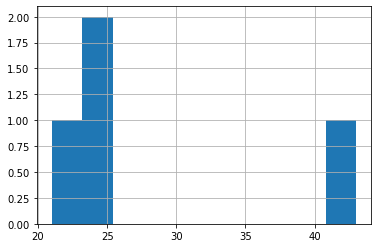

In [20]:
data.mpg[data.carclass == 'L'].hist()

In [21]:
### This is not normally distributed!

In [22]:
### Let's look at a histogram of SUV:

<AxesSubplot:>

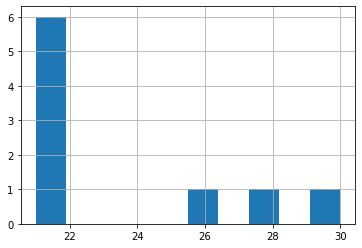

In [23]:
data.mpg[data.carclass=='SUV'].hist()

In [24]:
# This is also not normally distributed!

In [25]:
### We will still run our test for learning purposes:

In [26]:
ttest_ind(data.mpg[data.carclass == 'L'], data.mpg[data.carclass == 'SUV'])

Ttest_indResult(statistic=1.4311696139394496, pvalue=0.18017311952980603)

In [27]:
### p value here is 0.180 this is not statistically signficant because the p > .05
### this makes sense because the a large car and an SUV would probably have similar gas mileages.

### Dependent t-Test

In [28]:
# Dependent t-tests are used when your samples are related in some way, but you still want to see if the means change. 
# It may be change over time, or change with treatment, etc. A dependent t requires an independent variable that is categorical
# (groups to compare) and a dependent variable that is continuous (from page 8 of Lesson 1).

#### Read in new dataset:

In [29]:
data2 = pd.read_excel('../Data/hybrid2012-13.xlsx')

In [30]:
data2.head()

,vehicle,msrp2012,accelrate2012,mpg2012,mpgmpge2012,carclass2012,carclass_id2012,msrp2013,accelrate2013,mpg2013,mpgmpge2013,carclass2013,carclass_id2013
0,ActiveHybrid 3,19006.62,9.35,50,50,C,1,19080,8.70,50,50,C,1
1,ActiveHybrid 5,32095.61,8.82,50,95,M,3,24995,12.66,45,45,C,1
2,Ampera,31739.55,11.11,37,98,C,1,24200,10.20,50,50,M,3
3,Camry LE,62180.23,16.67,26,26,M,3,18600,11.76,42,42,C,1
4,Chevrolet Volt,59126.14,16.95,31,31,M,3,69850,16.39,21,21,SUV,6


In [31]:
### We are going to be comparing two groups, the mpg2012 and mpg2013

In [32]:
### We will look for normality in the histograms again!
### remember the syntax is the datasetname['column'].hist()

<AxesSubplot:>

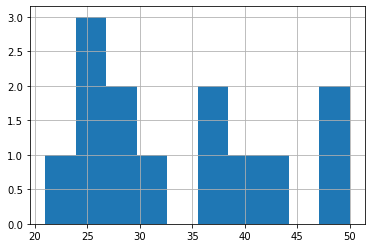

In [33]:
data2['mpg2012'].hist()

In [34]:
#not normal but not terrible

<AxesSubplot:>

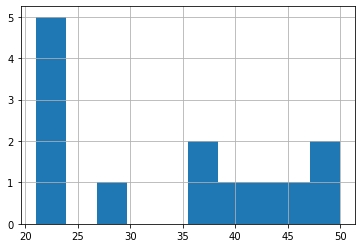

In [35]:
data2['mpg2013'].hist()

In [36]:
### also not normal

In [37]:
### Running our analysis

In [38]:
stats.ttest_rel(data2['mpg2012'], data2['mpg2013'])

Ttest_relResult(statistic=0.14466598084438312, pvalue=0.8873759030512348)

In [39]:
### p value is 0.888 which is not significant , pretty safe to say not too much changed in the mpg in only one 
### year from 2012 to 2013

### Independent Chi Square

In [40]:
### An independent Chi-Square is used when you want to determine whether two categorical variables influence each other.

In [41]:
## Reading in data on lipsticks

In [42]:
data3 = pd.read_csv('../Data/lead_lipstick.csv')

In [43]:
data3.head()

,JRC_code,purchCntry,prodCntry,Pb,sdPb,shade,prodType,priceCatgry
0,C135,NL,NL,3.75,0.24,Red,LP,2
1,C18,FI,FI,2.29,0.07,Red,LP,2
2,C20,FI,IT,1.27,0.06,Red,LP,2
3,C164,DE,FR,1.21,0.06,Red,LP,2
4,C71,MT,UK,0.85,0.04,Red,LP,2


In [44]:
#We are going to do a different example than the lesson we let's look at if shade of lipstick varies by the purchasing country!

In [45]:
#We will create a contingency table (aka crosstab) before we run the independent Chi-Square analysis!
#which shows how each level of each variable crosses with the other variable levels. 
#pandas package contains the function called crosstab()  (page 11 from the lesson)

In [46]:
lipstick_crosstab = pd.crosstab(data3['purchCntry'], data3['shade'])

In [47]:
lipstick_crosstab

shade,Brown,Pink,Purple,Red
purchCntry,,,,
AT,4,4,4,3
BE,2,4,5,4
CZ,4,11,0,1
DE,4,4,1,3
EL,3,7,1,3
ES,8,2,3,2
FI,3,9,1,3
FR,5,5,1,4
IT,4,11,4,2


In [48]:
### Above you can see which countries got which shades of lipstick

In [49]:
stats.chi2_contingency(lipstick_crosstab)

(47.73664134703487,
 0.2509425596132608,
 42,
 array([[4.03587444, 5.44843049, 2.48878924, 3.02690583],
        [4.03587444, 5.44843049, 2.48878924, 3.02690583],
        [4.30493274, 5.81165919, 2.65470852, 3.22869955],
        [3.22869955, 4.35874439, 1.99103139, 2.42152466],
        [3.76681614, 5.08520179, 2.32286996, 2.82511211],
        [4.03587444, 5.44843049, 2.48878924, 3.02690583],
        [4.30493274, 5.81165919, 2.65470852, 3.22869955],
        [4.03587444, 5.44843049, 2.48878924, 3.02690583],
        [5.65022422, 7.62780269, 3.48430493, 4.23766816],
        [4.30493274, 5.81165919, 2.65470852, 3.22869955],
        [4.03587444, 5.44843049, 2.48878924, 3.02690583],
        [3.76681614, 5.08520179, 2.32286996, 2.82511211],
        [4.03587444, 5.44843049, 2.48878924, 3.02690583],
        [4.03587444, 5.44843049, 2.48878924, 3.02690583],
        [2.42152466, 3.2690583 , 1.49327354, 1.8161435 ]]))

In [50]:
### We can see the p value is 0.25 so the results are not significant and there is not a significant relationship between
### country and lipstick shade but wait...
### Notice above how many of the cells are less than 5, that would mean that this would not be appropriate to draw
### conclusions from this analysis as to meet the assumptions cells need to be at a minimum of 5. 

### Correlation Matrix!!

In [51]:
#This one is my fav!!
#look at correlations between variables 

In [83]:
#read in dataset

In [52]:
data4 = pd.read_excel('../Data/cruise_ship.xlsx')

In [53]:
data4.head()

,Ship,Line,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
0,Journey,Azamara,2007,30277,694,594,355,355,42.64,329
1,Quest,Azamara,2007,30277,694,594,355,355,42.64,329
2,Celebration,Carnival,1987,47262,1486,722,743,670,31.80,453
3,Conquest,Carnival,2002,110000,2974,953,1488,1910,36.99,892
4,Destiny,Carnival,1996,101353,2642,892,1321,1000,38.36,740


In [54]:
### So a correlation matrix shows the strength of correlations between variables, so as you may have guessed, we need to remove
### columns that are categorical. Only continuous variables can be used so we will drop the two columns Ship and Line
### There are multiple ways to drop columns here is one way:

In [55]:
cruise_ship1 = data4.drop(['Ship', 'Line'], axis=1)

In [56]:
#Now we can run our data we called cruise_ship1 to follow along with the lesson so you can see the data without those two 
#columns. Do you remember the code to see the first 6 rows of data?
#it's head()!

In [57]:
cruise_ship1.head()

,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
0,2007,30277,694,594,355,355,42.64,329
1,2007,30277,694,594,355,355,42.64,329
2,1987,47262,1486,722,743,670,31.80,453
3,2002,110000,2974,953,1488,1910,36.99,892
4,1996,101353,2642,892,1321,1000,38.36,740


In [58]:
##Tada! Now we are ready for the correlation matrix, however before we do that , I am going to show you another way to drop columns
##You can also create a new dataframe and only select the columns you want to keep:
##See below , I only took the columns that I know easily what it means without a key

In [59]:
select_what_you_want = cruise_ship1[['YearBlt', 'passngrs', 'Length', 'Cabins', 'Crew']]

In [60]:
select_what_you_want.head()

,YearBlt,passngrs,Length,Cabins,Crew
0,2007,694,594,355,355
1,2007,694,594,355,355
2,1987,1486,722,743,670
3,2002,2974,953,1488,1910
4,1996,2642,892,1321,1000


In [61]:
### So that our correlation matrix looks pretty we are going to use the first one so we have more columns to compare:)
### Now the code below, you can copy and paste that and just change the dataset name to match what you are working on (assuming 
### you removed the categorical variables as well like we did here). I changed the color gradient to turbo here for more contrast


In [62]:
cruise_ship1.corr(method='pearson').style.format("{:.5}").background_gradient(cmap=plt.get_cmap('turbo'), axis=1)

,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
YearBlt,1.0,0.60665,0.51554,0.53229,0.51002,0.53066,0.27883,0.5472
Tonnage,0.60665,1.0,0.94506,0.92237,0.94876,0.92757,-0.040846,0.92193
passngrs,0.51554,0.94506,1.0,0.88353,0.97634,0.91523,-0.29487,0.91455
Length,0.53229,0.92237,0.88353,1.0,0.8898,0.89586,-0.090488,0.90105
Cabins,0.51002,0.94876,0.97634,0.8898,1.0,0.95082,-0.25318,0.93414
Crew,0.53066,0.92757,0.91523,0.89586,0.95082,1.0,-0.15551,0.90047
PassSpcR,0.27883,-0.040846,-0.29487,-0.090488,-0.25318,-0.15551,1.0,-0.1456
outcab,0.5472,0.92193,0.91455,0.90105,0.93414,0.90047,-0.1456,1.0


In [63]:
### Here is a heatmap below that reflects the same data just different colors with the scale next to it

<AxesSubplot:>

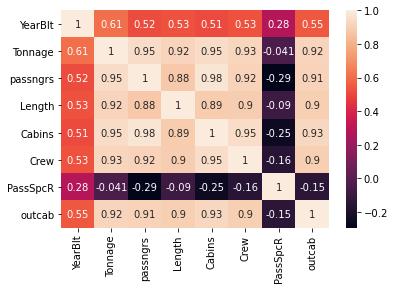

In [64]:
sns.heatmap(cruise_ship1.corr(), annot=True)

In [65]:
### Notice the ones going down the middle, that is a perfect correlation of 1. You see which variables were highly and lowly 
### correlated at a glance which is why these visualizations are so awesome and totally helpful in explaining data!

In [108]:
### From Mia :) Hope you enjoyed these examples!